<a href="https://colab.research.google.com/github/sarjakpatel/SJSU/blob/main/CMPE%20258/Assignment%203/CMPE_258_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 258 Assignment 3.1
 Write  a colab  numpy only from scratch 3 layer deep neural network for non linear regression . Use proper non linear activation functions and proper number of hidden layer neurons - show the results / loss and epochs training and final output . You will be doing manual backprop and chain rule based gradient propagation 

 **Creating the data set using numpy array of 0s and 1s**

In [13]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]

# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]

# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]

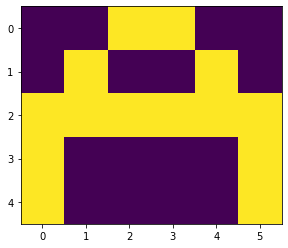

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, ploting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

**Defining the architecture or structure of the deep neural network**

Convert the matrix of 0 and 1 into one hot vector
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.

In [15]:
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
								np.array(c).reshape(1, 30)]

In [16]:
# Labels are also converted into NumPy array
y = np.array(y)

In [17]:
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


**Declaring and defining all the function to build deep neural network**

activation function:

In [18]:
def sigmoid(x):
	return(1/(1 + np.exp(-x)))

Creating the Feed forward neural network:

1 Input layer(1, 30)

1 hidden layer (1, 5)

1 output layer(3, 3)

In [19]:
def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# out put of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# output of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

In [20]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show()

**Initializing the weights, as the neural network is having 3 layers, so there will be 2 weight matrix associate with it. The size of each matrix depends on the number of nodes in two connecting layers**

In [21]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[ 1.24404146  0.60171581 -0.01718101 -1.82078739  0.17074933]
 [-1.91470829 -0.73039179 -0.23068292  0.90881414 -0.93807059]
 [-0.27963904 -0.05264864 -0.56892522  0.35396771 -1.71849042]
 [ 1.37863885  1.73941207  0.01433121  0.92877171  0.70030075]
 [ 0.43738899 -0.22423897 -1.54783435 -0.0758692  -0.6981387 ]
 [ 0.49862094  0.43068431 -2.61872138 -1.13829207  0.59109138]
 [ 0.25554547 -1.70613989 -0.50885516  0.81911325  0.72246237]
 [ 0.70379044 -0.54335481  0.35209004  0.64315412  2.38568648]
 [-0.4851605   0.73512566 -0.6551338  -0.37976675 -0.82584063]
 [ 1.67869463  1.12919788 -1.53679659 -0.20021384 -2.15405781]
 [ 0.9364723   1.55139056  1.36469595  1.00561688  0.82446497]
 [-0.5404768   0.24295172  0.64079018  1.28139116 -0.67383378]
 [ 0.36345532  0.53080532  0.06626967 -0.75661079 -1.58818729]
 [ 0.72529011 -2.52104245 -1.08660236  1.35950728 -0.79690392]
 [ 1.61695178  1.31351154  0.85040029  0.58159159  0.7402119 ]
 [-0.70811954 -1.39673584 -0.7683765   0.02141079 -0.00

**Training the model**

The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2

In [22]:
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 66.0353702865802
epochs: 2 ======== acc: 69.6700872988904
epochs: 3 ======== acc: 72.61850379033439
epochs: 4 ======== acc: 74.99937451608344
epochs: 5 ======== acc: 76.93674712672764
epochs: 6 ======== acc: 78.53147023286226
epochs: 7 ======== acc: 79.86162627546275
epochs: 8 ======== acc: 80.9874642838565
epochs: 9 ======== acc: 81.95580587482914
epochs: 10 ======== acc: 82.80329334893814
epochs: 11 ======== acc: 83.55870075604385
epochs: 12 ======== acc: 84.2445620032339
epochs: 13 ======== acc: 84.87827371114042
epochs: 14 ======== acc: 85.47277195280414
epochs: 15 ======== acc: 86.03688970341274
epochs: 16 ======== acc: 86.57557017536996
epochs: 17 ======== acc: 87.09020172417067
epochs: 18 ======== acc: 87.57935757997744
epochs: 19 ======== acc: 88.04005223224371
epochs: 20 ======== acc: 88.46927471277232
epochs: 21 ======== acc: 88.86527458595256
epochs: 22 ======== acc: 89.22815281398874
epochs: 23 ======== acc: 89.55970899082575
epochs: 24 ======== acc:

**Plotting the graphs of loss and accuracy with respect to number of epochs(Iteration)**

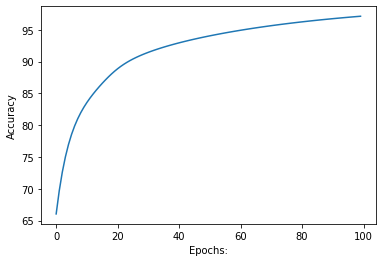

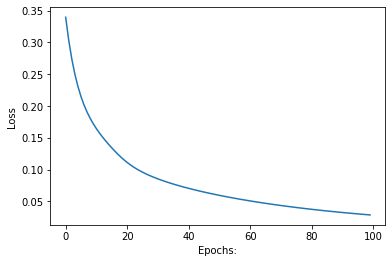

In [23]:
import matplotlib.pyplot as plt1

# ploting accuraccy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [24]:
# the trained weigths are
print(w1, "\n", w2)

[[ 1.24404146  0.60171581 -0.01718101 -1.82078739  0.17074933]
 [-2.13976237 -0.85374682 -0.39038248  0.91759143 -0.46091561]
 [-0.49529176 -0.033595   -0.56056896  0.36197257 -1.34781399]
 [ 1.16298613  1.75846571  0.02268747  0.93677656  1.07097718]
 [ 0.21233491 -0.34759399 -1.70753391 -0.0670919  -0.22098373]
 [ 0.49862094  0.43068431 -2.61872138 -1.13829207  0.59109138]
 [ 0.25554547 -1.70613989 -0.50885516  0.81911325  0.72246237]
 [ 0.48813772 -0.52430117  0.3604463   0.65115897  2.75636291]
 [-0.4851605   0.73512566 -0.6551338  -0.37976675 -0.82584063]
 [ 1.67869463  1.12919788 -1.53679659 -0.20021384 -2.15405781]
 [ 0.67107796  1.57860017  1.85566554  1.00423863  0.63565933]
 [-0.5404768   0.24295172  0.64079018  1.28139116 -0.67383378]
 [ 0.37285669  0.67321399  0.23432549 -0.75738323 -1.69466583]
 [ 0.5096374  -2.50198881 -1.0782461   1.36751214 -0.42622748]
 [ 1.35155744  1.34072115  1.34136989  0.58021333  0.55140626]
 [-0.97351389 -1.36952623 -0.27740691  0.02003254 -0.19

**Making prediction**

The predict function will take the following arguments:

1) image matrix
2) w1 trained weights
3) w2 trained weights

Image is of letter B.


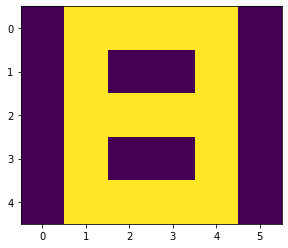

In [25]:
predict(x[1], w1, w2)